In [1]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from torchvision.transforms.v2 import RandomHorizontalFlip, RandomVerticalFlip, RandomRotation
from torchvision.datasets import ImageFolder
from torch.utils.data import random_split, Dataset, DataLoader
import matplotlib.pyplot as plt

from src.data_utils import TransformDataset

# Этап 1. Загрузка и предобработка данных

vita_c
zadex_60_mg
xeter_20_mg
vitamin_d3_fresenius_1000_ne
vitamin_d3_fresenius_1000_ne
vitamin_d3_fresenius_1000_ne
xeter_20_mg
voltaren_dolo_rapid_25_mg
voltaren_dolo_rapid_25_mg
zadex_60_mg
Количество изображений в train: 112
Количество изображений в val: 28
Список классов: ['vita_c', 'vitamin_d3_fresenius_1000_ne', 'voltaren_dolo_rapid_25_mg', 'xeter_20_mg', 'zadex_60_mg']


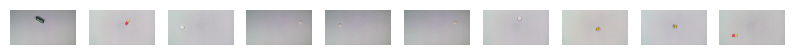

In [2]:
train_transforms = Compose([
    RandomHorizontalFlip(p=0.2),
    RandomVerticalFlip(p=0.2),
    RandomRotation([-5, 5], fill=255.),
    Resize((224, 224)),
    ToTensor(),
    Normalize((0.5), (0.5))
])

test_transforms = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize((0.5), (0.5))
])

dataset = ImageFolder('./data/train')

train_dataset, val_dataset = random_split(dataset, [0.8, 0.2])

fig = plt.figure(figsize=(10,5))
for index in range (1, 11):
    image, label = train_dataset[index]
    print(dataset.classes[label])
    plt.subplot(1, 10, index)
    plt.imshow(image)
    plt.axis('off')

train_dataset = TransformDataset(train_dataset, train_transforms)
val_dataset = TransformDataset(val_dataset, test_transforms)

batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

print("Количество изображений в train:", len(train_dataset))
print("Количество изображений в val:", len(val_dataset))
print("Список классов:", dataset.classes) 

# Этап 2. Объявление модели

In [3]:
from torchsummary import summary
from torchvision.models import mobilenet_v3_small
import torch.nn as nn

model = mobilenet_v3_small(weights='IMAGENET1K_V1')

model.classifier = nn.Linear(in_features=576, out_features=5, bias=True)

for param in model.parameters():
    param.requires_grad = False


for param in model.classifier.parameters():
    param.requires_grad = True

summary(model, input_size=(3, 224, 224), device='cpu') 

Downloading: "https://download.pytorch.org/models/mobilenet_v3_small-047dcff4.pth" to C:\Users\zinov/.cache\torch\hub\checkpoints\mobilenet_v3_small-047dcff4.pth


100%|██████████| 9.83M/9.83M [00:00<00:00, 11.0MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 112, 112]             432
       BatchNorm2d-2         [-1, 16, 112, 112]              32
         Hardswish-3         [-1, 16, 112, 112]               0
            Conv2d-4           [-1, 16, 56, 56]             144
       BatchNorm2d-5           [-1, 16, 56, 56]              32
              ReLU-6           [-1, 16, 56, 56]               0
 AdaptiveAvgPool2d-7             [-1, 16, 1, 1]               0
            Conv2d-8              [-1, 8, 1, 1]             136
              ReLU-9              [-1, 8, 1, 1]               0
           Conv2d-10             [-1, 16, 1, 1]             144
      Hardsigmoid-11             [-1, 16, 1, 1]               0
SqueezeExcitation-12           [-1, 16, 56, 56]               0
           Conv2d-13           [-1, 16, 56, 56]             256
      BatchNorm2d-14           [-1, 16,